In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
pip install numpy pandas Pillow scikit-learn pillow matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 68.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 71.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.5 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 80.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 67.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 105.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 97.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 KB 141.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 112.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 30.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB

In [4]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        with Image.open(img_path) as img:
            img = img.resize((64, 64)) 
            img_array = np.array(img)  
            if img_array.shape[2] == 4:  
                img_array = img_array[:, :, :3] 
            images.append(img_array.flatten())  
            labels.append(label)
    return images, labels

In [5]:
folders = {
    'normal': '/workspace/Data-Science-Road-Map/pavanassignment/DR/0.0.Normal',
    'laser_dragged': '/workspace/Data-Science-Road-Map/pavanassignment/DR/27.Laser Spots',
    'glaucoma': '/workspace/Data-Science-Road-Map/pavanassignment/DR/10.0.Possible glaucoma',
    'dragged_disc': '/workspace/Data-Science-Road-Map/pavanassignment/DR/13.Dragged Disc'
}

In [6]:
all_images = []
all_labels = []
for label, folder in folders.items():
    images, labels = load_images_from_folder(folder, label)
    all_images.extend(images)
    all_labels.extend(labels)

In [7]:
all_images = np.array(all_images)
all_labels = np.array(all_labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

In [9]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [10]:
y_pred = knn.predict(X_test)

In [11]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 0  0  1  0]
 [ 0  2  0  1]
 [ 0  0  2  0]
 [ 0  1  0 10]]

Accuracy Score: 0.8235294117647058

Classification Report:
               precision    recall  f1-score   support

 dragged_disc       0.00      0.00      0.00         1
     glaucoma       0.67      0.67      0.67         3
laser_dragged       0.67      1.00      0.80         2
       normal       0.91      0.91      0.91        11

     accuracy                           0.82        17
    macro avg       0.56      0.64      0.59        17
 weighted avg       0.78      0.82      0.80        17



/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [12]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Classification Report:
               precision    recall  f1-score   support

 dragged_disc       0.00      0.00      0.00         1
     glaucoma       0.67      0.67      0.67         3
laser_dragged       0.67      1.00      0.80         2
       normal       0.91      0.91      0.91        11

     accuracy                           0.82        17
    macro avg       0.56      0.64      0.59        17
 weighted avg       0.78      0.82      0.80        17



In [13]:
import seaborn as sns

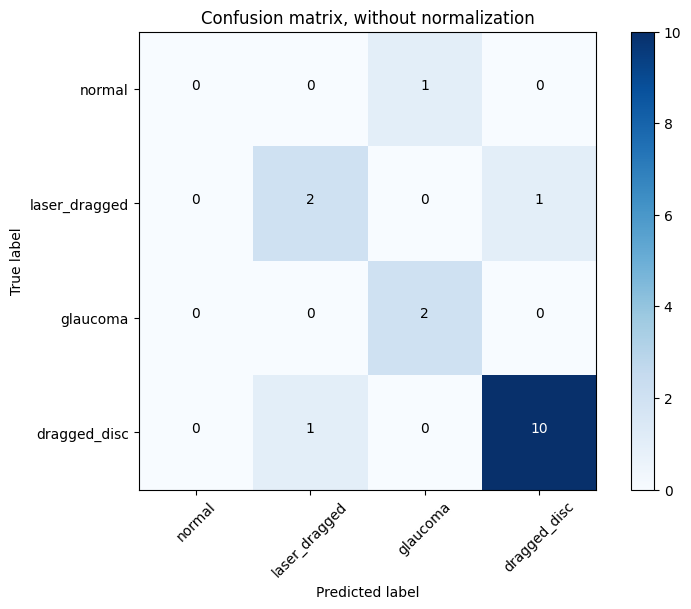

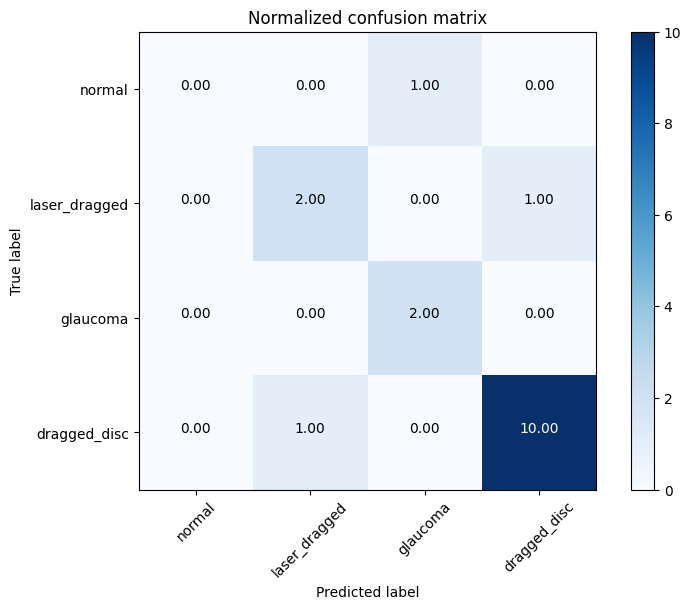

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = confusion_matrix(y_test, y_pred)
class_names = ['normal', 'laser_dragged', 'glaucoma', 'dragged_disc']
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix, without normalization')
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()


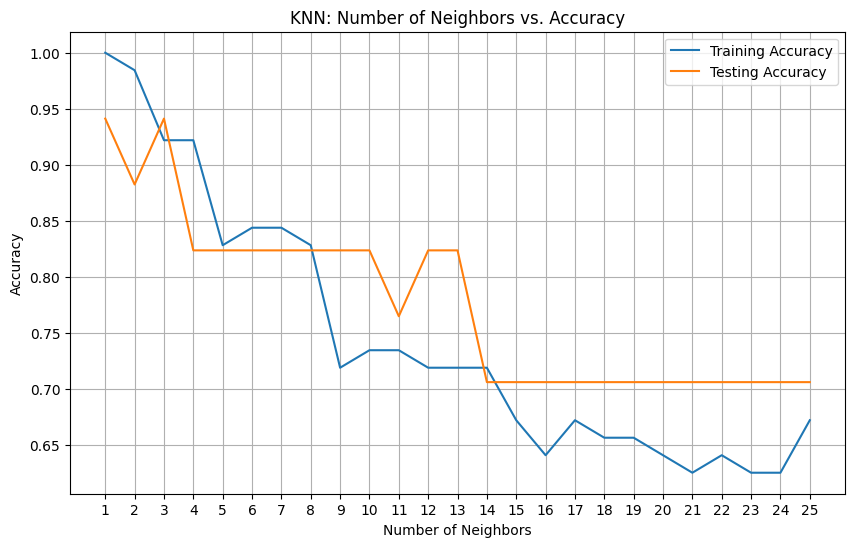

In [15]:
k_values = range(1, 26)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_accuracies.append(train_accuracy)
    y_pred_test = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Number of Neighbors vs. Accuracy')
plt.legend()
plt.xticks(k_values)
plt.grid(True)
plt.show()